# Load dataset

In [1]:
#pip install git+ssh://git@github.com/Debkumar000/text_preprocess_dkbera.git
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import text_preprocess_dkbera
nlp = spacy.load("en_core_web_lg")
%matplotlib inline

In [2]:
df=pd.read_csv("SPAM.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [4]:
df.shape

(5572, 2)

In [5]:
df["Category"].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [6]:
df["length"]=df["Message"].apply(lambda x: text_preprocess_dkbera.get_charcounts(x))

In [7]:
df["punct"]=df["Message"].apply(lambda x: sum(1 for token in nlp(x) if token.is_punct))

In [8]:
df

,Category,Message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",92,4
1,ham,Ok lar... Joking wif u oni...,24,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,1
3,ham,U dun say so early hor... U c already then say...,39,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",49,1
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,131,7
5568,ham,Will ü b going to esplanade fr home?,29,1
5569,ham,"Pity, * was in mood for that. So...any other s...",48,5
5570,ham,The guy did some bitching but I acted like i'd...,100,0


# Balance dataset

In [9]:
ham = df[df["Category"]=="ham"]
ham.head()

,Category,Message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",92,4
1,ham,Ok lar... Joking wif u oni...,24,2
3,ham,U dun say so early hor... U c already then say...,39,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",49,1
6,ham,Even my brother is not like to speak with me. ...,62,2


In [10]:
spam = df[df["Category"]=="spam"]
spam.head()

,Category,Message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,1
5,spam,FreeMsg Hey there darling it's been 3 week's n...,116,4
8,spam,WINNER!! As a valued network customer you have...,132,6
9,spam,Had your mobile 11 months or more? U R entitle...,126,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",111,5


In [11]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [12]:
ham = ham.sample(spam.shape[0])

In [13]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [14]:
data = ham.append(spam, ignore_index=True)

C:\Users\debku\AppData\Local\Temp\ipykernel_8680\2287010461.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = ham.append(spam, ignore_index=True)


In [15]:
data.sample(5)

,Category,Message,length,punct
1078,spam,Tone Club: Your subs has now expired 2 re-sub ...,127,3
989,spam,"Free msg. Sorry, a service you ordered from 81...",122,4
653,ham,Hi. I'm sorry i missed your call. Can you pls ...,45,3
637,ham,My sister got placed in birla soft da:-),33,1
805,spam,FREE RINGTONE text FIRST to 87131 for a poly o...,125,3


In [16]:
data["Category"].value_counts()

ham     747
spam    747
Name: Category, dtype: int64

In [17]:
data

,Category,Message,length,punct
0,ham,Oops I was in the shower when u called. Hey a ...,117,4
1,ham,I‘m parked next to a MINI!!!! When are you com...,58,5
2,ham,"Yup. Anything lor, if u dun wan it's ok...",34,3
3,ham,Call me when you get the chance plz &lt;3,33,1
4,ham,"Nah it's straight, if you can just bring bud o...",102,1
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,75,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,126,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,133,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,120,2


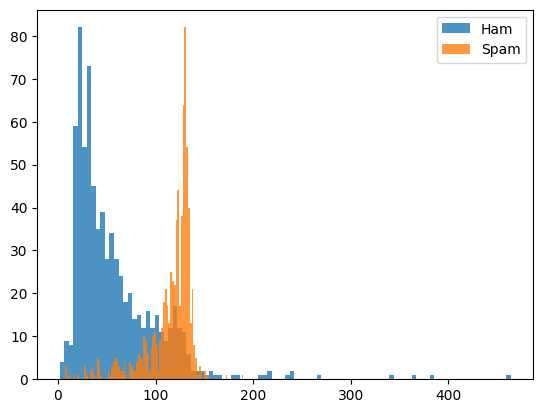

In [18]:
plt.hist(ham["length"], bins=100, alpha=0.8, label="Ham")
plt.hist(spam["length"], bins=100, alpha=0.8, label="Spam")
plt.legend()
plt.show()

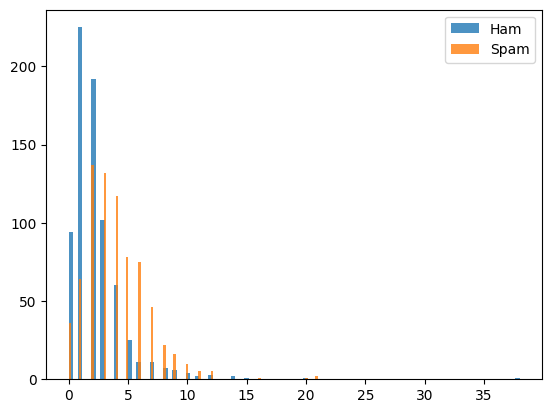

In [19]:
plt.hist(ham["punct"], bins=100, alpha=0.8, label="Ham")
plt.hist(spam["punct"], bins=100, alpha=0.8, label="Spam")
plt.legend()
plt.show()

# Data preparation and prediction

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
data.head()

,Category,Message,length,punct
0,ham,Oops I was in the shower when u called. Hey a ...,117,4
1,ham,I‘m parked next to a MINI!!!! When are you com...,58,5
2,ham,"Yup. Anything lor, if u dun wan it's ok...",34,3
3,ham,Call me when you get the chance plz &lt;3,33,1
4,ham,"Nah it's straight, if you can just bring bud o...",102,1


In [22]:
tfidf=TfidfVectorizer()
X = tfidf.fit_transform(data["Message"])

In [23]:
X.shape

(1494, 4495)

In [24]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, data["Category"], test_size=0.33, random_state=42, stratify=data["Category"])

In [26]:
X_train.shape, X_test.shape

((1000, 4495), (494, 4495))

In [27]:
y_train.shape, y_test.shape

((1000,), (494,))

# Random forest classifier

In [28]:
rfc=RandomForestClassifier(n_estimators=100, n_jobs=-1)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [29]:
y_pred=rfc.predict(X_test)

In [30]:
confusion_matrix(y_test, y_pred)

array([[247,   0],
       [ 17, 230]], dtype=int64)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97       247
        spam       1.00      0.93      0.96       247

    accuracy                           0.97       494
   macro avg       0.97      0.97      0.97       494
weighted avg       0.97      0.97      0.97       494



# SVM

In [32]:
svm=SVC(C=1000,gamma='auto')
svm.fit(X_train, y_train)

SVC(C=1000, gamma='auto')

In [33]:
y_pred=svm.predict(X_test)

In [34]:
confusion_matrix(y_test, y_pred)

array([[244,   3],
       [ 18, 229]], dtype=int64)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.99      0.96       247
        spam       0.99      0.93      0.96       247

    accuracy                           0.96       494
   macro avg       0.96      0.96      0.96       494
weighted avg       0.96      0.96      0.96       494



# Test model with real data (predict)

In [36]:
def predict(x):
    x=tfidf.transform([x])
    x=x.toarray()
    pred=svm.predict(x)
    return pred

In [37]:
predict("Hi, this is Debkumar")

array(['ham'], dtype=object)

In [38]:
predict("Congratulations! You've won a free vacation! Click here to claim your prize now!")

array(['spam'], dtype=object)